# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
def f(x):
    f = (x**2)*(numpy.sin(x))
    return f;

Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    g = -1*(x**2)*(numpy.cos(x))+2*x*(numpy.sin(x))+2*(numpy.cos(x))-2
    return g;

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [9]:
def integrate_analytic(xmin, xmax):
    integrate_analytic = g(xmax) - g(xmin)
    return integrate_analytic;

Check your analytic function:

In [10]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [11]:
def integrate_numeric(xmin, xmax, N):
    if (N%2==1):
        N=N+1
    dx = (xmax-xmin)/N
    x = numpy.linspace(xmin,xmax,N+1)
    y = f(x)
    integrate_numeric = dx/3 * numpy.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return integrate_numeric;

Make sure you have implemented Simpson's rule correctly:

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [13]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


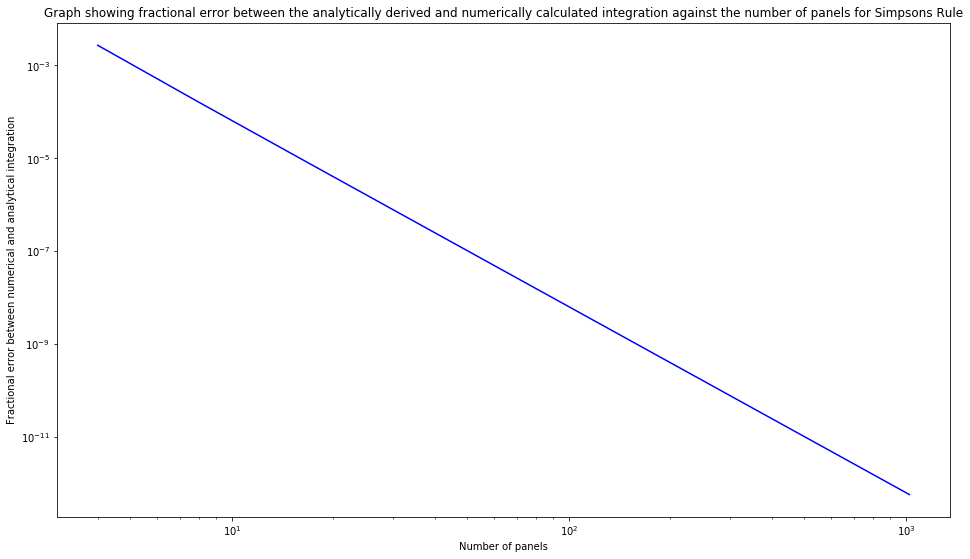

In [15]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

import pylab
import math
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,20))
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Graph showing fractional error between the analytically derived and numerically calculated integration against the number of panels for Simpsons Rule")
plt.xlabel("Number of panels")
plt.ylabel("Fractional error between numerical and analytical integration")
difference = plt.plot([4,8,16,32,64,128,256,512,1024], [(abs(integrate_numeric(xmin=0,xmax=2,N=4) - g(2)))/g(2),(abs(integrate_numeric(xmin=0,xmax=2,N=8) - g(2)))/g(2),(abs(integrate_numeric(xmin=0,xmax=2,N=16) - g(2)))/g(2),(abs(integrate_numeric(xmin=0,xmax=2,N=32) - g(2)))/g(2),(abs(integrate_numeric(xmin=0,xmax=2,N=64) - g(2)))/g(2),(abs(integrate_numeric(xmin=0,xmax=2,N=128) - g(2)))/g(2),(abs(integrate_numeric(xmin=0,xmax=2,N=256) - g(2)))/g(2),(abs(integrate_numeric(xmin=0,xmax=2,N=512) - g(2)))/g(2),(abs(integrate_numeric(xmin=0,xmax=2,N=1024) - g(2)))/g(2)], label = 'Numerically calculated result', color = 'blue')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The number of panels used increases the accuracy of the numerical method for all estimations of the integral, with faster convergence to the true value for smooth functions. However, due to the finite processing power of computers, a number of panels (N) that is too large may decrease the accuracy of the numerical method and correspond to a larger integration error. This value of N is different for each numerical method and function, though clearly does not occur on the above graph. The integration error scales like $\ N^{-4}$ against panel count for Simpson's Rule for $\ N <$ too large $\ N$, which is the numerical method used.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The more panels that were used, the more accurate the estimation of the integral would be (up until a value that is too large as discussed above). This is because the trapeziums are smaller and can better fit, and thus estimate the area underneath, the curves that they are estimating. This integration error scales like $\ N^{-2} $ against panel count for the trapezium rule.